## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm



df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


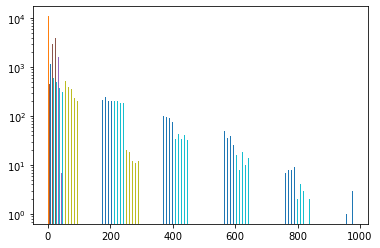

In [2]:
histo = plt.hist(df, bins = 100, log = True)
df.head()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [3]:
#среднее
df.mean()

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [4]:
#дисперсия
df.var()

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64

In [5]:
#50-й персентиль
np.percentile(df, 50)

12.3

In [6]:
#75-й персентиль
np.percentile(df, 75)

37.88

In [7]:
#90-й персентиль
np.percentile(df, 90)

123.0

In [8]:
#мода
df.mode()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,4,0,1,1,14.76,31.06,88,0.0,0,3,5


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [9]:
#эксцесс
kurt = pd.DataFrame(kurtosis(df))
kurt.T

,0,1,2,3,4,5,6,7,8,9,10
0,-1.35559,30.032624,-1.397737,0.3948,-0.914661,-0.850236,-0.76002,0.629292,7.54761,2.624324,1.298945


In [10]:
#асимметрия
skewness = pd.DataFrame(skew(df))
skewness.T

,0,1,2,3,4,5,6,7,8,9,10
0,-0.007075,5.659737,-0.776056,1.243313,0.00369,-0.102545,-0.086323,0.588685,2.495404,1.524594,1.241895


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [11]:
def my_norm_confidence(df=df, column = "count", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

confidence = my_norm_confidence()
print(confidence)


(-163.46247359398893, 546.6107374190854)


### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


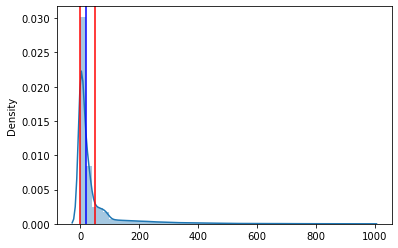

In [12]:
upper_level = df.atemp.mean() + 3*df.atemp.std()
lower_level = df.atemp.mean() - 3*df.atemp.std()
level_50 = np.percentile(df.temp, 50)

sns.distplot(df)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_50, color="b", linestyle="-")


In [13]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [14]:
anomaly = find_anomaly(df=df, column = "atemp")
anomaly[0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2245,2,0,1,2,33.62,40.150,59,15.0013,26,86,112
2246,2,0,1,1,35.26,41.665,53,0.0000,32,137,169
2247,2,0,1,1,36.90,40.910,37,12.9980,29,125,154
2248,2,0,1,1,36.90,40.910,37,16.9979,40,105,145
2249,2,0,1,1,36.90,41.665,39,19.9995,25,127,152
...,...,...,...,...,...,...,...,...,...,...,...
8695,3,0,0,1,36.90,40.910,39,19.9995,197,253,450
8715,3,0,0,1,35.26,40.150,47,35.0008,161,330,491
8716,3,0,0,1,36.08,40.910,44,31.0009,208,315,523
8717,3,0,0,1,36.90,42.425,42,31.0009,161,365,526


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


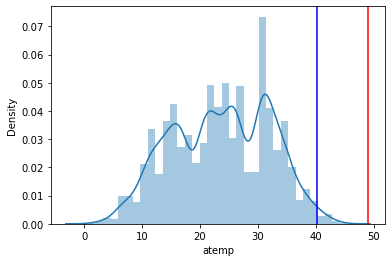

In [15]:
sns.distplot(df.atemp)
plt.axvline(x=anomaly[1], color="r", linestyle="-")
plt.axvline(x=anomaly[2], color="b", linestyle="-")

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [16]:
correlation = df.corr()
correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

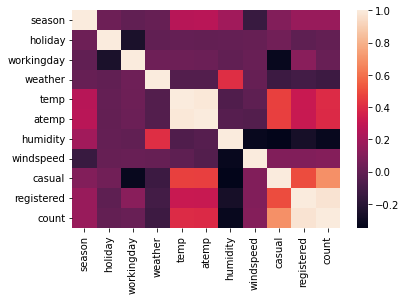

In [17]:
sns.heatmap(correlation)